# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.185986e+01     6.282644e+00
 * time: 0.0049211978912353516
     1     2.719883e+01     6.531588e+00
 * time: 0.014564990997314453
     2     2.501900e+01     1.176446e+01
 * time: 0.036962032318115234
     3     1.305935e+01     2.521880e+00
 * time: 0.1598072052001953
     4     1.186969e+01     2.325196e+00
 * time: 0.1770470142364502
     5     1.106117e+01     1.209184e+00
 * time: 0.19414615631103516
     6     1.012255e+01     1.277395e+00
 * time: 0.21118617057800293
     7     9.443958e+00     9.950123e-01
 * time: 0.2281022071838379
     8     9.233639e+00     7.680529e-01
 * time: 0.2450730800628662
     9     9.156944e+00     1.359422e+00
 * time: 0.25799012184143066
    10     9.066763e+00     9.659944e-01
 * time: 0.27491021156311035
    11     8.977903e+00     8.666908e-01
 * time: 0.28783106803894043
    12     8.914334e+00     4.681547e-01
 * time: 0.3007659912109375
    13     8.847232e+00     3.874651e-01
 * time: 

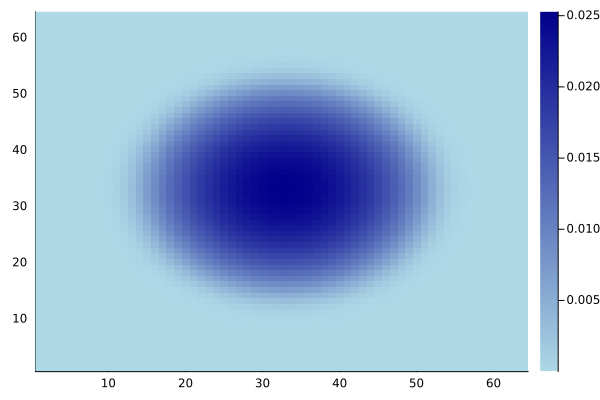

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)